In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.svm import SVC

In [148]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%cd C:/Users/markg/Documents/Python/UofM_Course
%pwd

C:\Users\markg\Documents\Python\UofM_Course


'C:\\Users\\markg\\Documents\\Python\\UofM_Course'

## Regression

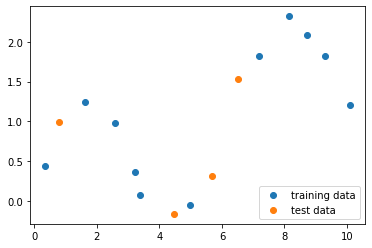

In [153]:
np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# You can use this function to help you visualize the dataset by
# plotting a scatterplot of the data points
# in the training and test sets.
def part1_scatter():
#     import matplotlib.pyplot as plt
#     %matplotlib notebook
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);
    
    
# NOTE: Uncomment the function below to visualize the data, but be sure 
# to **re-comment it before submitting this assignment to the autograder**.   
part1_scatter()

In [152]:
# question 1

predict_input = np.linspace(0,10,100).reshape(100,1)
predict_output = np.zeros((4,100))

for i in range(4):   
    deg = [1,3,6,9]
    
    poly = PolynomialFeatures(degree = deg[i])

    X_train = X_train.reshape(len(X_train), 1)
    X_train_poly = poly.fit_transform(X_train)
    
    predict_input_poly = poly.fit_transform(predict_input)

    linreg = LinearRegression().fit(X_train_poly, y_train)

    predict_output[i] = linreg.predict(predict_input_poly)

predict_output

array([[ 2.53040195e-01,  2.69201547e-01,  2.85362899e-01,
         3.01524251e-01,  3.17685603e-01,  3.33846955e-01,
         3.50008306e-01,  3.66169658e-01,  3.82331010e-01,
         3.98492362e-01,  4.14653714e-01,  4.30815066e-01,
         4.46976417e-01,  4.63137769e-01,  4.79299121e-01,
         4.95460473e-01,  5.11621825e-01,  5.27783177e-01,
         5.43944529e-01,  5.60105880e-01,  5.76267232e-01,
         5.92428584e-01,  6.08589936e-01,  6.24751288e-01,
         6.40912640e-01,  6.57073992e-01,  6.73235343e-01,
         6.89396695e-01,  7.05558047e-01,  7.21719399e-01,
         7.37880751e-01,  7.54042103e-01,  7.70203454e-01,
         7.86364806e-01,  8.02526158e-01,  8.18687510e-01,
         8.34848862e-01,  8.51010214e-01,  8.67171566e-01,
         8.83332917e-01,  8.99494269e-01,  9.15655621e-01,
         9.31816973e-01,  9.47978325e-01,  9.64139677e-01,
         9.80301028e-01,  9.96462380e-01,  1.01262373e+00,
         1.02878508e+00,  1.04494644e+00,  1.06110779e+0

In [151]:
# question 2

r2_train = np.zeros((10))
r2_test = np.zeros((10))
result = np.zeros((10,2))

for i in range(10):
    poly = PolynomialFeatures(degree = i)

    X_train = X_train.reshape(len(X_train), 1)
    X_train_poly = poly.fit_transform(X_train)
    X_test = X_test.reshape(len(X_test), 1)
    X_test_poly = poly.fit_transform(X_test)

    linreg = LinearRegression().fit(X_train_poly, y_train)
    
    r2_train[i] = linreg.score(X_train_poly, y_train)
    r2_test[i] = linreg.score(X_test_poly, y_test)

    result = (r2_train, r2_test)

result

(array([0.        , 0.42924578, 0.4510998 , 0.58719954, 0.91941945,
        0.97578641, 0.99018233, 0.99352509, 0.99637545, 0.99803706]),
 array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
         0.87708301,  0.9214094 ,  0.92021504,  0.63247953, -0.64525322]))

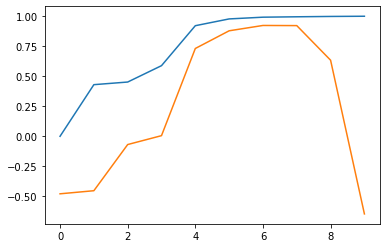

In [121]:
plt.figure()
plt.plot(result[0])
plt.plot(result[1])

In [150]:
poly = PolynomialFeatures(degree = 12)

X_train = X_train.reshape(len(X_train), 1)
X_train_poly = poly.fit_transform(X_train)
X_test = X_test.reshape(len(X_test), 1)
X_test_poly = poly.fit_transform(X_test)

linreg = LinearRegression().fit(X_train_poly, y_train)
lassoreg = Lasso(alpha=0.01, max_iter=10000).fit(X_train_poly, y_train)

r2_test = linreg.score(X_test_poly, y_test)
r2_test_lasso = lassoreg.score(X_test_poly, y_test)

result = (r2_test, r2_test_lasso)
result

C:\Users\markg\Documents\Python\UofM_Course\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.556e-01, tolerance: 6.895e-04
  model = cd_fast.enet_coordinate_descent(


(-4.311955012614152, 0.8406625614750236)

## Classification

In [156]:
mush_df = pd.read_csv('./datasets/ML/mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]

# use the variables X_train2, y_train2 for Question 5
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

X_subset = X_test2
y_subset = y_test2

For performance reasons in Questions 6 and 7, we will create a smaller version of the entire mushroom dataset for use in those questions.  For simplicity we'll just re-use the 25% test split created above as the representative subset.

**Use the variables X_subset, y_subset for Questions 6 and 7.**

In [207]:
clf = DecisionTreeClassifier(random_state=0).fit(X_train2, y_train2)

importance = clf.feature_importances_
cols = X_train2.columns

top5 = (pd.DataFrame({'importance':importance}, index = cols)
      .sort_values('importance', ascending = False)
      .head(5)
      .index
      .tolist()
     )
top5

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

In [ ]:
gammas = np.logspace(-4,1,6)
train_score, test_score = validation_curve(SVC(kernel='rbf', C = 1, random_state=0),
                                           X_subset, y_subset, 
                                           param_range = gammas, 
                                           param_name = 'gamma',
                                           scoring='accuracy',
                                           cv = 3)

train_mean = train_score.mean(axis = 1)
test_mean = test_score.mean(axis = 1)
result = (train_mean, test_mean)
result

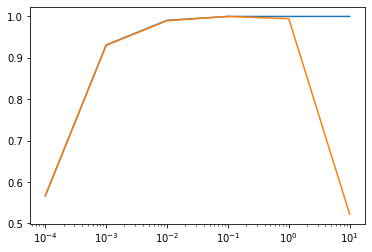

In [234]:
plt.semilogx(gammas, result[0])
plt.semilogx(gammas, result[1])